In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchmetrics
from tqdm.auto import tqdm

import torchvision

sns.set()
import numpy as np
import os
import pandas as pd
import sys

sys.path.append("..")
import hydra
from src.lib.config import register_configs
from src.utils.EvalWrapper import EvalWrapper
from src.utils import utils 
from src.utils.eval_single_helper_funcs import get_confidence_and_acc_single, get_temperature_file, get_distribution_file
from src.models.LightningBaseModel import LightningModel

register_configs()
try:
    hydra.initialize(config_path="../conf", job_name="plankton")
except ValueError:
    print(ValueError)

import glob
import pytorch_lightning as pl
import pickle
from src.utils.eval_single_helper_funcs import get_best_checkpoints

In [2]:
pl.seed_everything(7)
np.random.seed(7)
cfg = hydra.compose(config_name="config", overrides=["+experiment=plankton/publication/supervised_singlelabel", 
                                                     "random_seed=7", 
                                                     "strategy=SingleDevice", 
                                                     'strategy.device="cuda:0"', 
                                                     "trainer.enable_progress_bar=false",
                                                     "datamodule.batch_size=64",
                                                     "datamodule/train_transforms=finetune_plankton"])

train_transforms = hydra.utils.instantiate(cfg.datamodule.train_transforms)
valid_transforms = hydra.utils.instantiate(cfg.datamodule.valid_transforms)

datamodule = hydra.utils.instantiate(
    cfg.datamodule,
    train_transforms=train_transforms,
    valid_transforms=valid_transforms,
    dataset=cfg.datamodule.dataset,
    is_ddp=False,
)
datamodule.setup(stage="fit")

Global seed set to 7
/gpfs/home/machnitz/miniconda3/envs/plankton/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:95: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
77it [00:00, 11716.36it/s]                                                                                                                                                                | 0/19 [00:00<?, ?it/s]
4536it [00:00, 10275.73it/s]
88it [00:00, 6327.12it/s]████████████▌                                                                                                                                            | 2/19 [00:00<00:03,  4.41it/s]
100it [00:00, 7014.36it/s]
95it [00:00, 7456.33it/s]
288it [00:00, 7944.65it/s]
12it [00:00, 5185.62it/s]
158it [00:00, 7777.53it/s]
59it [00:00, 7392.72it/s]██████████████████████████████████████████████████████████████                                                   

  0%|          | 0/64 [00:00<?, ?it/s]

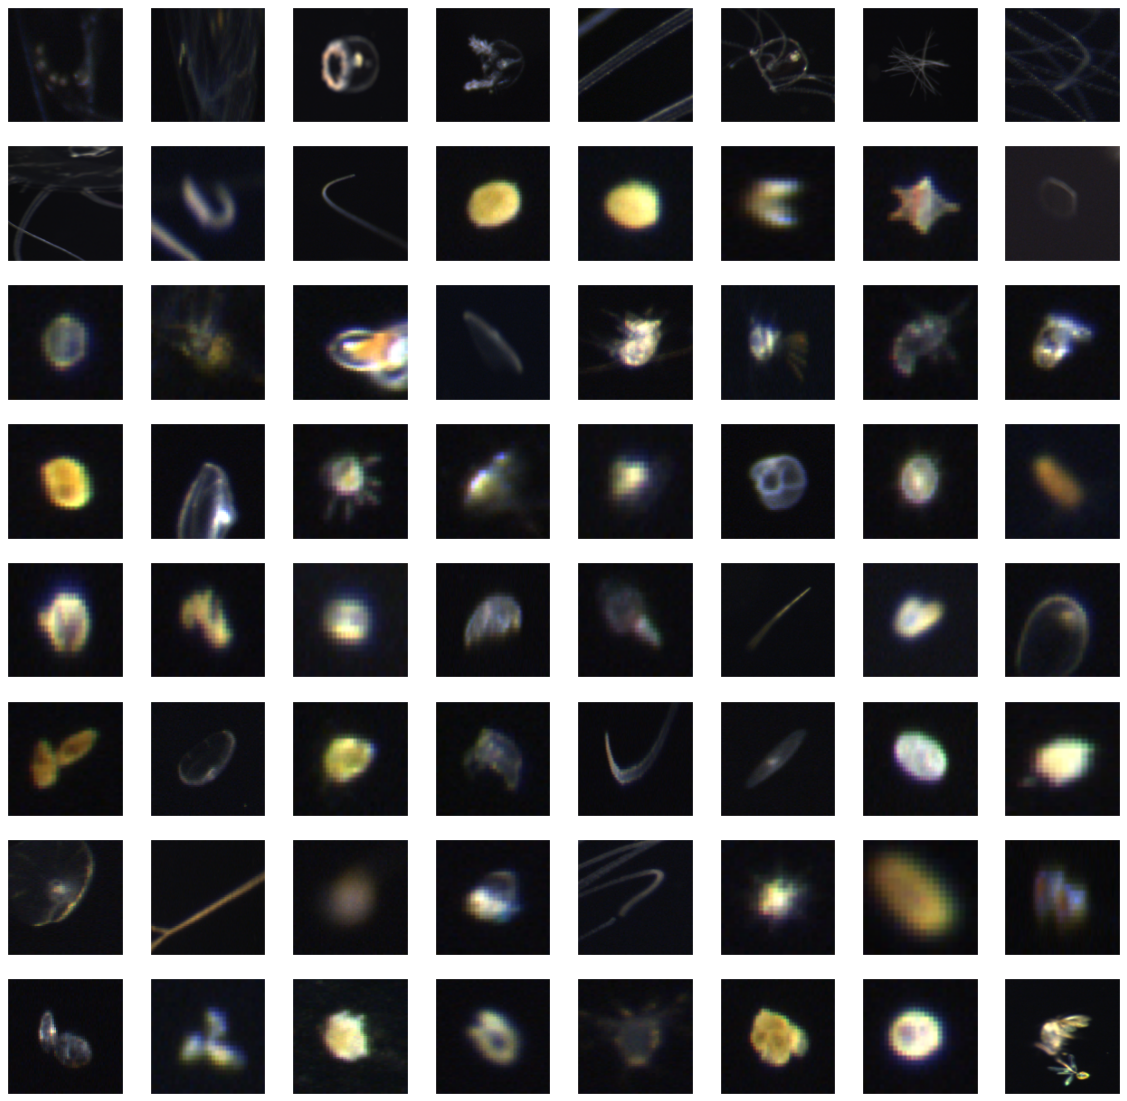

In [3]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20,20))

to_image = torchvision.transforms.ToPILImage()
for batch in datamodule.val_dataloader():
    images, _ = batch
    
    for i, tensor in enumerate(tqdm(images)):
        image = to_image(tensor)
        ax = axes.flatten()[i]
        ax.imshow(image)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    
    break

plt.show()

In [4]:
pl.seed_everything(7)
np.random.seed(7)
cfg = hydra.compose(config_name="config", overrides=["+experiment=plankton/publication/supervised_singlelabel", 
                                                     "random_seed=7", 
                                                     "strategy=SingleDevice", 
                                                     'strategy.device="cuda:0"', 
                                                     "trainer.enable_progress_bar=false",
                                                     "datamodule.batch_size=64",
                                                     "datamodule/train_transforms=simclr_plankton",
                                                     "datamodule/valid_transforms=simclr_plankton",
                                                    ])

train_transforms = hydra.utils.instantiate(cfg.datamodule.train_transforms)
valid_transforms = hydra.utils.instantiate(cfg.datamodule.valid_transforms)

datamodule = hydra.utils.instantiate(
    cfg.datamodule,
    train_transforms=train_transforms,
    valid_transforms=valid_transforms,
    dataset=cfg.datamodule.dataset,
    is_ddp=False,
)
datamodule.setup(stage="fit")

Global seed set to 7
77it [00:00, 12044.96it/s]                                                                                                                                                                | 0/19 [00:00<?, ?it/s]
4536it [00:00, 13763.40it/s]
88it [00:00, 12390.02it/s]███████████▌                                                                                                                                            | 2/19 [00:00<00:02,  5.87it/s]
100it [00:00, 12904.36it/s]
95it [00:00, 11248.91it/s]
288it [00:00, 13746.65it/s]
12it [00:00, 9231.78it/s]
158it [00:00, 13097.87it/s]
59it [00:00, 12207.78it/s]
1215it [00:00, 19879.38it/s]
386it [00:00, 25786.44it/s]████████████████████████████████████████████████████████████████████████████                                                                          | 10/19 [00:00<00:00, 24.73it/s]
56it [00:00, 12005.78it/s]
1290it [00:00, 21074.93it/s]
207it [00:00, 12933.81it/s]
506it [00:00, 14405.59it/s]████████████████

  0%|          | 0/64 [00:00<?, ?it/s]

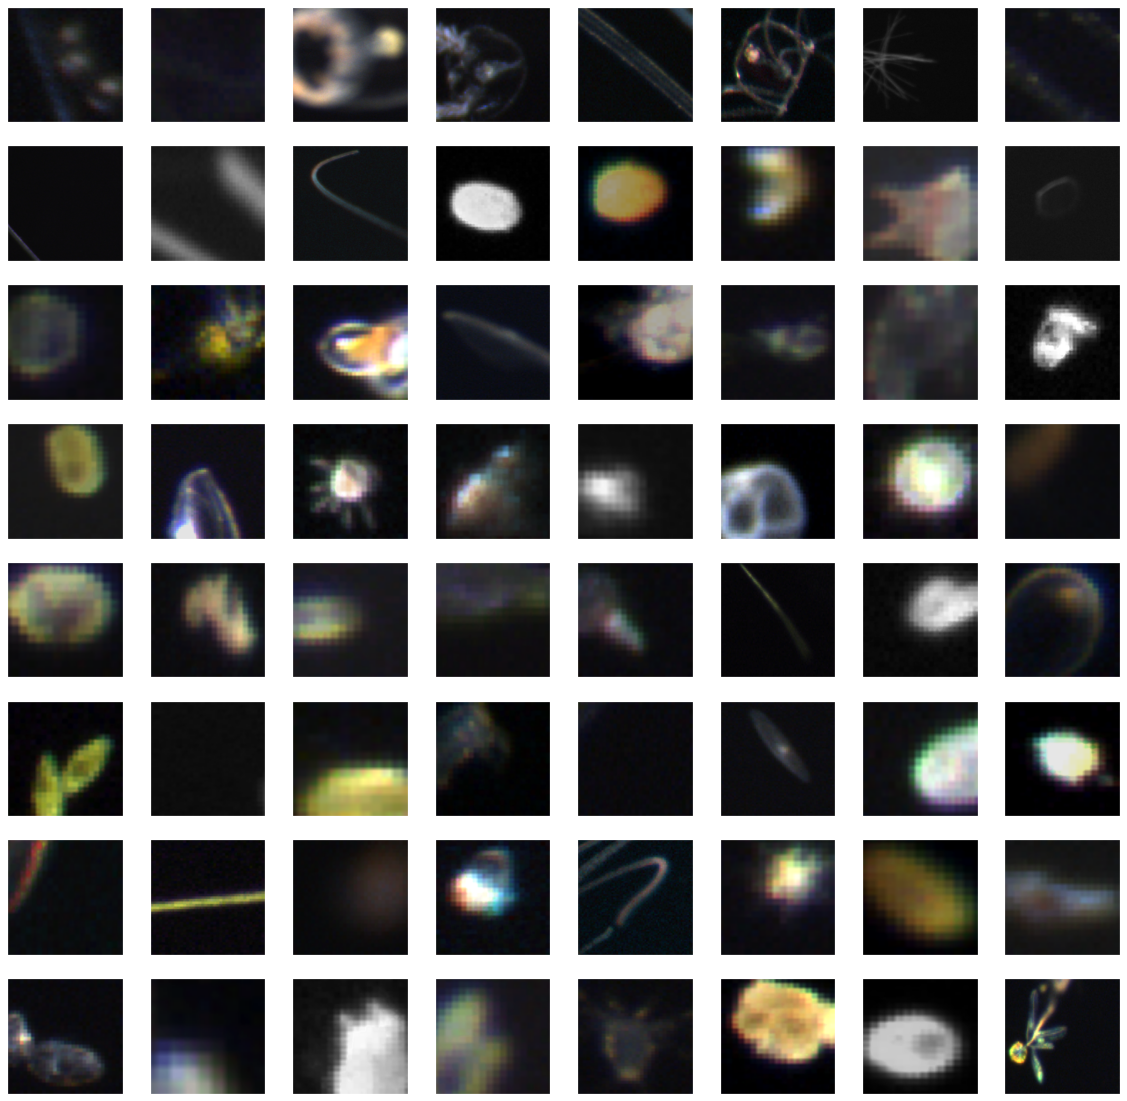

In [5]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20,20))

to_image = torchvision.transforms.ToPILImage()
for batch in datamodule.val_dataloader():
    images, _ = batch
    
    for i, tensor in enumerate(tqdm(images)):
        image = to_image(tensor)
        ax = axes.flatten()[i]
        ax.imshow(image)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

    break
        
plt.show()

In [6]:
pl.seed_everything(7)
np.random.seed(7)
cfg = hydra.compose(config_name="config", overrides=["+experiment=plankton/publication/supervised_singlelabel", 
                                                     "random_seed=7", 
                                                     "strategy=SingleDevice", 
                                                     'strategy.device="cuda:0"', 
                                                     "trainer.enable_progress_bar=false",
                                                     "datamodule.batch_size=64",
                                                     "datamodule/train_transforms=finetune_plankton",
                                                     "datamodule/valid_transforms=finetune_plankton",
                                                    ])

train_transforms = hydra.utils.instantiate(cfg.datamodule.train_transforms)
valid_transforms = hydra.utils.instantiate(cfg.datamodule.valid_transforms)

datamodule = hydra.utils.instantiate(
    cfg.datamodule,
    train_transforms=train_transforms,
    valid_transforms=valid_transforms,
    dataset=cfg.datamodule.dataset,
    is_ddp=False,
)
datamodule.setup(stage="fit")

Global seed set to 7
77it [00:00, 7460.93it/s]                                                                                                                                                                 | 0/19 [00:00<?, ?it/s]
4536it [00:00, 11244.76it/s]
88it [00:00, 11803.98it/s]███████████▌                                                                                                                                            | 2/19 [00:00<00:03,  4.77it/s]
100it [00:00, 12512.47it/s]
95it [00:00, 10852.46it/s]
288it [00:00, 13575.78it/s]
12it [00:00, 9186.28it/s]
158it [00:00, 12685.68it/s]
59it [00:00, 11984.89it/s]
1215it [00:00, 19513.92it/s]
386it [00:00, 25010.83it/s]████████████████████████████████████████████████████████████████████████████                                                                          | 10/19 [00:00<00:00, 21.44it/s]
56it [00:00, 12053.83it/s]
1290it [00:00, 20922.38it/s]
207it [00:00, 13164.04it/s]
506it [00:00, 14246.13it/s]████████████████

  0%|          | 0/64 [00:00<?, ?it/s]

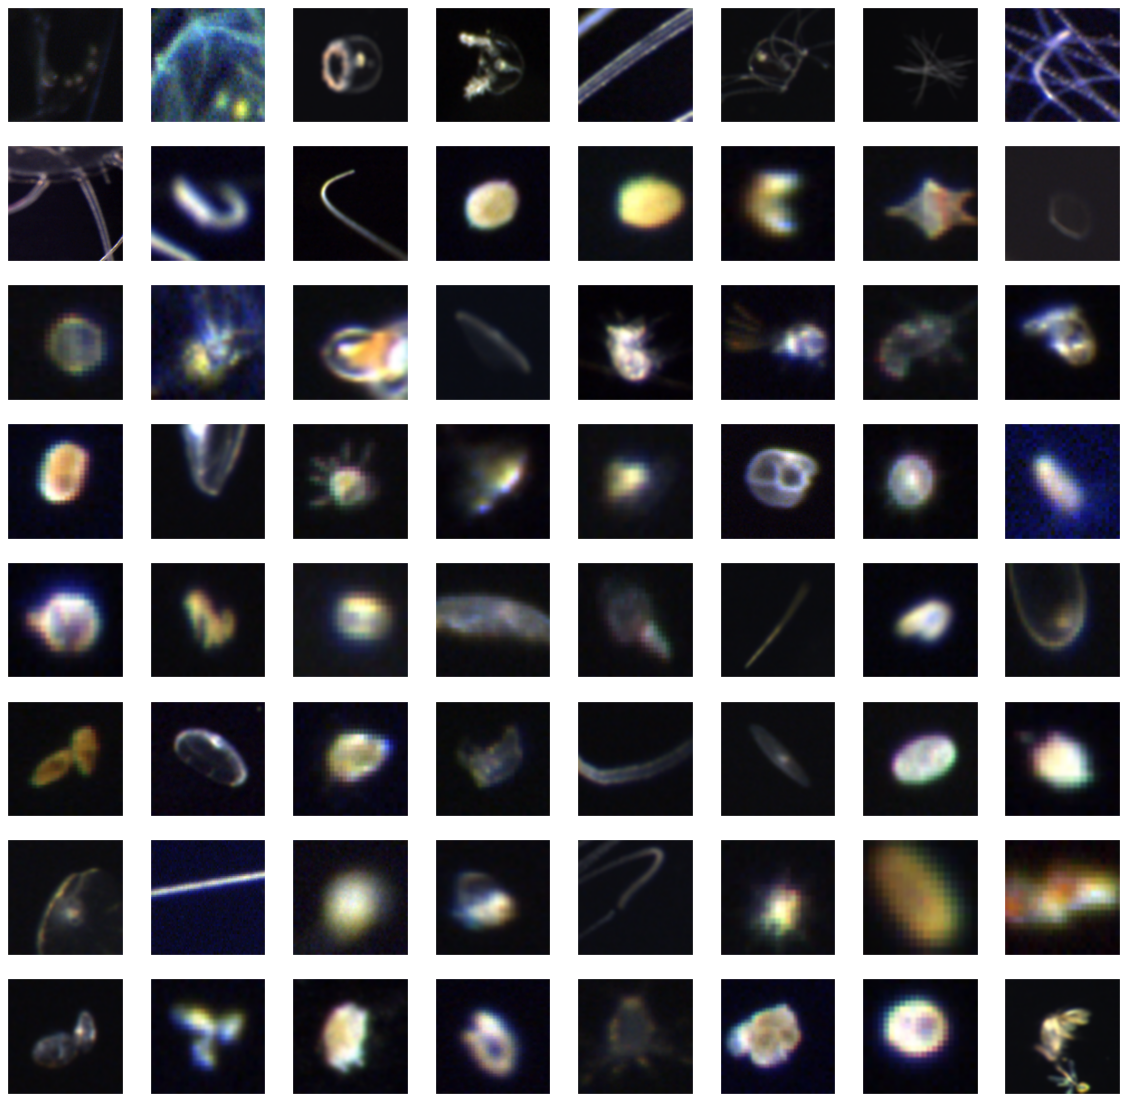

In [7]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20,20))

to_image = torchvision.transforms.ToPILImage()
for batch in datamodule.val_dataloader():
    images, _ = batch
    
    for i, tensor in enumerate(tqdm(images)):
        image = to_image(tensor)
        ax = axes.flatten()[i]
        ax.imshow(image)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

    break
        
plt.show()